In [53]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram # just for displaying
from sklearn.cluster import AgglomerativeClustering,ward_tree


In [54]:
def get_linkage_matrix(children, distances, n_samples):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        counts[i] = sum(1 if child_idx < n_samples else counts[child_idx - n_samples] for child_idx in merge)
    linkage_matrix = np.column_stack([children,distances, counts]).astype(float)
    return linkage_matrix

In [58]:
X = [
    'ACGCGATGACCGGGCCTTGTATT',
    'ATGATGACAGGGCTTGTAACT',
    'TTCATGACCGGCTTATACTTA',
    'ACGCGATGACCGGGCCTTGTA',
    'ATGATGACAGGGCTTGTAACT',
    'TTCATGACCGGCTTATACTTA',
    'CGTTGCCGTTACATTTAAGGC',
    'GCAGGCGTTTACTTACGCAGT',
    'TCGTTAGCCTGGTTTTTACCC',
    'AACGCAGGTTAGTGGTACGTT',
    'CTGCCGTGTATTTCACAGGAC',
    'GAGCGGCTCACGGGTTTGGTT',
    'TTAGCCGAGTTTTAGTTTCCG'
]
max_len = max(len(x) for x in X)

# make X a numpy array of shape (n_samples, max_len)
X = np.array([list(x + '_' * (max_len - len(x))) for x in X])
# one hot encode the data
X = np.array([[1 if x == y else 0 for x in 'ACGT'] for y in X.flatten()]).reshape(X.shape[0], -1)

# AgglomerativeClustering

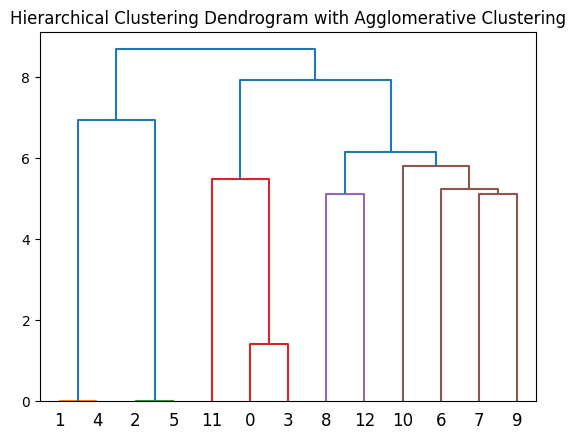

In [59]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
children = model.children_
distances = model.distances_
n_samples = len(model.labels_)
linkage_mat = get_linkage_matrix(children, distances, n_samples)

plt.title("Hierarchical Clustering Dendrogram with Agglomerative Clustering")
# plot the top three levels of the dendrogram
_ = dendrogram(linkage_mat)

# Ward Tree

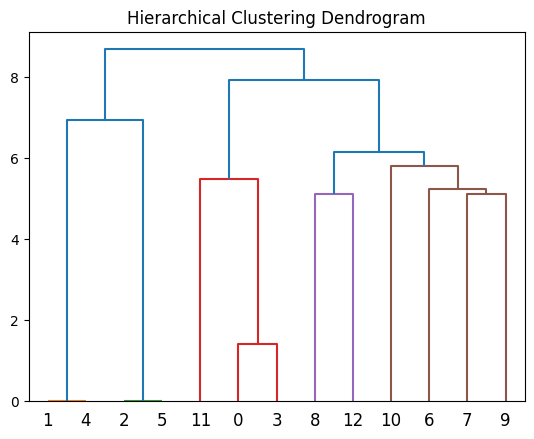

In [60]:
model = ward_tree(X,return_distance=True)
children,_,_,_,distances = model
n_samples = len(X)
linkage_mat = get_linkage_matrix(children, distances, n_samples)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
_ = dendrogram(linkage_mat)